<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Modules-for-this-notebook" data-toc-modified-id="Modules-for-this-notebook-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Modules for this notebook</a></span></li></ul></li><li><span><a href="#Random-Samples" data-toc-modified-id="Random-Samples-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Random Samples</a></span><ul class="toc-item"><li><span><a href="#An-intuitive-approach" data-toc-modified-id="An-intuitive-approach-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>An intuitive approach</a></span></li></ul></li><li><span><a href="#Choosing-exactly-$m$-terms" data-toc-modified-id="Choosing-exactly-$m$-terms-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Choosing exactly $m$ terms</a></span></li><li><span><a href="#Computing-$G_{ER}(n,m)$" data-toc-modified-id="Computing-$G_{ER}(n,m)$-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Computing $G_{ER}(n,m)$</a></span></li><li><span><a href="#Computing-$G_{ER}(n,p)$" data-toc-modified-id="Computing-$G_{ER}(n,p)$-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Computing $G_{ER}(n,p)$</a></span><ul class="toc-item"><li><span><a href="#Our-own-function" data-toc-modified-id="Our-own-function-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Our own function</a></span></li><li><span><a href="#The-gnp_random_graph()-function" data-toc-modified-id="The-gnp_random_graph()-function-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>The <code>gnp_random_graph()</code> function</a></span></li></ul></li></ul></div>

<h1>CS4423-Networks: Week 9 (11+12 March 2025) 

# Part 2: Computing Random Graphs
Niall Madden, 
School of Mathematical and Statistical Sciences  
University of Galway


This Jupyter notebook, and PDF and HTML versions, can be found at https://www.niallmadden.ie/2425-CS4423/#Week09

<div class="rc"><font size="-1"><em>This notebook was written by Niall Madden, adapted from notebooks by Angela Carnevale.</em></div>

### Modules for this notebook

In [2]:
import networkx as nx
import numpy as np
opts = { "with_labels": True,  "node_color": "aqua"} # aqua nodes this week

import random   # some random number generators
import matplotlib.pyplot as plt

## Random Samples

* Our goal is to randomly select edges on a given vertex set $X$. That is, pick at random elements from the set $\binom{X}{2}$ of pairs of nodes.

* So we need a procedure
for selecting $m$ from $N$ objects randomly, in such a way that each of the $\binom{N}{m}$
subsets of the $N$ objects is an equally likely outcome.

* We first discuss sampling $m$ values in the range $\{0, 1, \dots, N{-}1\}$.

<div class="alert alert-block alert-info">Finished here <b>Thursday</b></div>

### An intuitive approach

Maybe the most obvious approach is to select each number in the desired range with probability $p = m/N$.

* `Python`'s basic random number generator `random.random` returns a random number in the (half-open) interval $[0, 1)$ every time it is called.  

* Looping with `a` over `range(N)`: if the randomly generated number is less than $p$, then we include the current value of `a`, if not we don't.

In [4]:
def random_sample_B(N, p):
    """sample elements in range(n) with probability p"""
    sample = []
    for a in range(N):
        if random.random() < p:
            sample.append(a)
    return sample 

In [17]:
random_sample_B(10,0.2)

[0, 2, 6]

We'd expect this to return a list of $pN$ numbers, which it does (on average)

In [28]:
sum_l = 0
N = 10
p = 0.2
for i in range(N):
    S = random_sample_B(N,p)
    sum_l += len(S)
    print(f"Sample {i:2d} has {len(S)} terms")
print(f"Avergae is {sum_l/N}")

Sample  0 has 1 terms
Sample  1 has 1 terms
Sample  2 has 2 terms
Sample  3 has 3 terms
Sample  4 has 1 terms
Sample  5 has 3 terms
Sample  6 has 2 terms
Sample  7 has 2 terms
Sample  8 has 2 terms
Sample  9 has 2 terms
Avergae is 1.9


Let's do that for 10,000 runs:

In [29]:
c = 10000
sum(len(random_sample_B(N, p)) for i in range(c))/c

1.9849

## Choosing exactly $m$ terms

To randomly select exactly $m$ numbers from from $0, 1, \dots, N-1$, we use a modification of this procedure 
[see Knuth: The Art of Computer Programming, Vol. 2, Section 3.4.2, Algorithm S] :

* The number $a$ should be selected with probability $\frac{m-c}{N-a}$,
if $c$ items have already been selected.



In [30]:
def random_sample_A(N, m):
    sample = []
    for a in range(N):
        if (N - a) * random.random() < m - len(sample):
            sample.append(a)
    return sample

Let's see a small example.

In [33]:
N = 10
m = 4
print( random_sample_A(N, m) )

[3, 4, 6, 9]


## Computing $G_{ER}(n,m)$ 
We can easily adapt the above procedure to compute examples of graphs in $G_{ER}(n,m)$.

But here we'll use the `networkx` random graph constructor, `gnm_random_graph`, to do this.


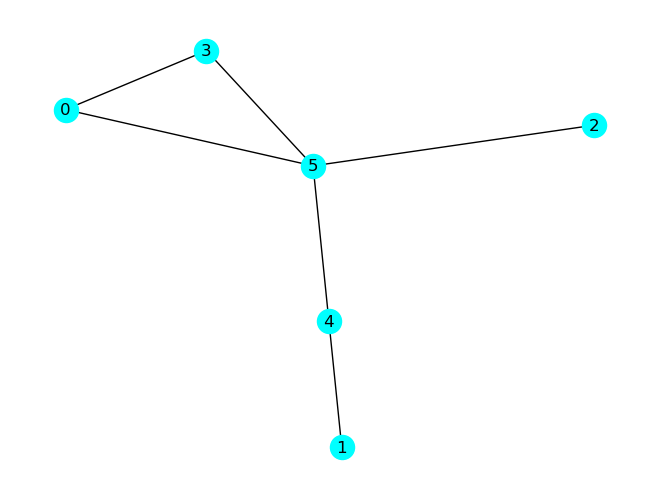

In [46]:
n = 6
m = 6 
G1 = nx.gnm_random_graph(n, m)
nx.draw(G1, **opts)

## Computing $G_{ER}(n,p)$

### Our own function

Here is a simple approach to computing a sample from $G_{ER}(n,p)$:

In [47]:
def random_graph_B(n, p):
    """construct a random type B graph
    with n nodes and edge probability p"""
    G = nx.empty_graph(n)
    for x in range(n):
        for y in range(x):
            if random.random() < p:
                G.add_edge(x, y)
    return G

In [63]:
n = 15
p = 0.2
N = n*(n-1)/2 

G2 has 20 edges. Expeced number is 21.0


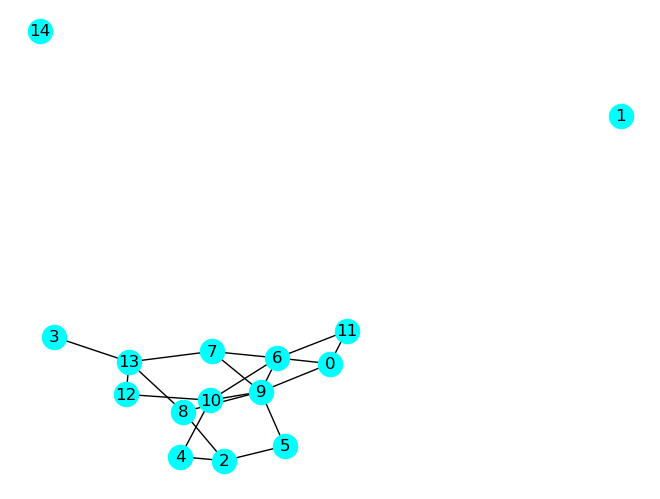

In [66]:
G2 = random_graph_B(n, p)
nx.draw(G2, **opts)
print(f"G2 has {G2.size()} edges. Expeced number is {p*N}")

### The `gnp_random_graph()` function

The `networkx` version of this random graph constructor is called `gnp_random_graph`
and should produce the same random graphs with the same probability (but should be more efficient for large networks).

G3 has 19 edges. Expeced number is 21.0


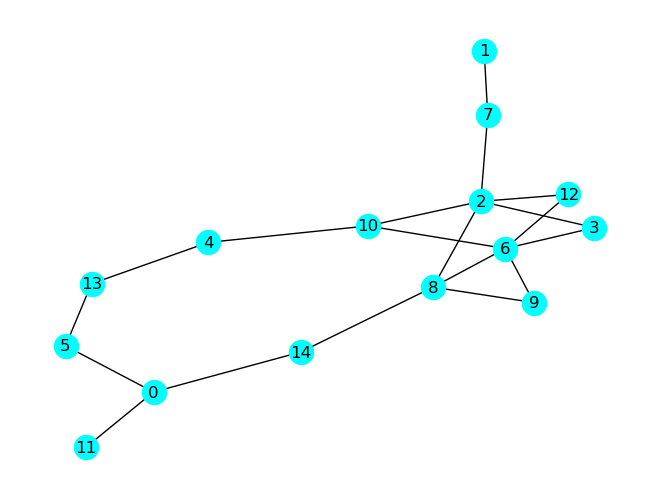

In [71]:
G3 = nx.gnp_random_graph(n, p)
nx.draw(G3, **opts)
print(f"G3 has {G3.size()} edges. Expeced number is {p*N}")

G4 has 114 edges. Expeced number is 99.0


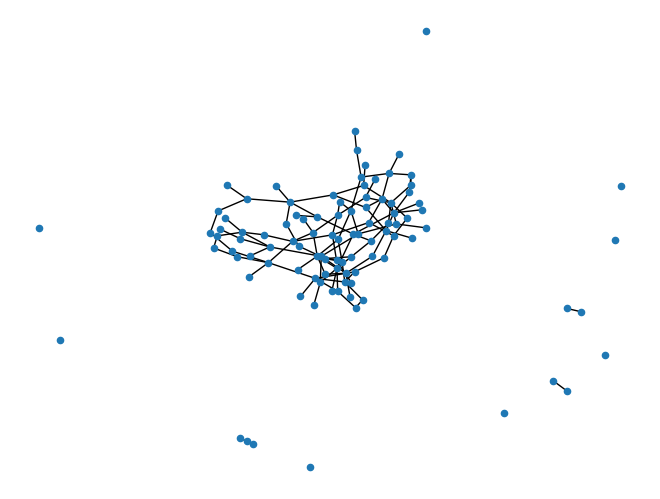

In [106]:
n = 100
p = 0.02
N = n*(n-1)/2 
G4 = nx.gnp_random_graph(n, p)
nx.draw(G4, node_size=20)
print(f"G4 has {G4.size()} edges. Expeced number is {p*N}")
plt.savefig("W09-cover.png")